### Exemplo: No nosso caso, vamos ver a performance de uma carteira de ativos. Vamos chamar de carteira do Lira.

- Temos o arquivo 'Carteira.xlsx' com os ativos e suas respectivas quantidades
- Vamos analisar como que os ativos performaram, quanto que rendeu a carteira como um todo e comparar com o IBOV

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

carteira = pd.read_excel('Carteira.xlsx')
display(carteira)

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,1000
3,BBDC4,Ação,100
4,ITUB4,Ação,100
5,ENEV3,Ação,300
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,GNDI3,Ação,100
9,NTCO3,Ação,100


### Criando nosso dataframe de Cotações dos ativos da carteira

In [13]:
cotacoes_carteira = pd.DataFrame()

start = dt.datetime(2020, 1, 1)
end = dt.datetime(2020, 11, 10)

for ativo in carteira['Ativos']:
    cotacoes_carteira[ativo] = yf.download(f'{ativo}.SA', start, end)['Adj Close']
    
cotacoes_carteira = cotacoes_carteira.dropna(axis=1, how='all')
display(cotacoes_carteira)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

ERROR 
1 Failed download:
ERROR ['GNDI3.SA']: Exception('GNDI3.SA: No timezone found, symbol may be delisted')



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11
Date,,,,,,,,,,,,,
2020-01-02,114.239998,139.500000,12.029735,24.439573,33.860638,10.9650,17.084024,17.714909,38.093487,108.023552,135.066345,181.281784,NaN
2020-01-03,113.800003,140.899994,11.922436,24.451948,33.504486,11.0675,17.537739,17.766314,40.747009,109.316162,133.253357,181.281784,NaN
2020-01-06,112.589996,139.100006,11.932189,24.015186,33.005890,11.3500,17.602497,17.740612,39.882378,108.460114,134.667511,179.810486,NaN
2020-01-07,112.239998,139.399994,11.898049,23.597980,32.240170,11.2650,17.567366,17.811388,40.528366,108.605659,130.379791,180.509766,NaN
2020-01-08,111.949997,138.199997,12.263843,23.232933,31.714851,11.2125,17.655197,17.653536,40.737072,106.636757,126.427528,170.292267,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,92.260002,109.980003,24.945910,15.097278,21.891125,13.8050,15.907248,16.902939,46.143505,92.015617,113.492004,143.790253,114.314499
2020-11-04,94.160004,112.000000,26.143793,14.987823,22.765312,14.4000,16.284945,17.820778,47.375851,92.024170,115.096481,143.844742,114.448997
2020-11-05,96.949997,115.900002,27.401571,15.219741,23.302568,14.6775,17.233580,18.608173,49.969746,92.024170,116.374619,143.663071,114.717934


### Será que todos os dados vieram corretos?

In [14]:
cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 2020-01-02 to 2020-11-09
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  214 non-null    float64
 1   SMAL11  214 non-null    float64
 2   MGLU3   214 non-null    float64
 3   BBDC4   214 non-null    float64
 4   ITUB4   214 non-null    float64
 5   ENEV3   214 non-null    float64
 6   MOVI3   214 non-null    float64
 7   BPAC11  214 non-null    float64
 8   NTCO3   214 non-null    float64
 9   BCRI11  214 non-null    float64
 10  VILG11  214 non-null    float64
 11  KNRI11  214 non-null    float64
 12  XPLG11  109 non-null    float64
dtypes: float64(13)
memory usage: 23.4 KB


### Ajustando os dados

In [17]:
# df_media = cotacoes_carteira.mean()
# cotacoes_carteira = cotacoes_carteira.fillna(df_media)
cotacoes_carteira = cotacoes_carteira.bfill()
cotacoes_carteira.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 214 entries, 2020-01-02 to 2020-11-09
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BOVA11  214 non-null    float64
 1   SMAL11  214 non-null    float64
 2   MGLU3   214 non-null    float64
 3   BBDC4   214 non-null    float64
 4   ITUB4   214 non-null    float64
 5   ENEV3   214 non-null    float64
 6   MOVI3   214 non-null    float64
 7   BPAC11  214 non-null    float64
 8   NTCO3   214 non-null    float64
 9   BCRI11  214 non-null    float64
 10  VILG11  214 non-null    float64
 11  KNRI11  214 non-null    float64
 12  XPLG11  214 non-null    float64
dtypes: float64(13)
memory usage: 23.4 KB


### Vamos ver como que as ações foram individualmente

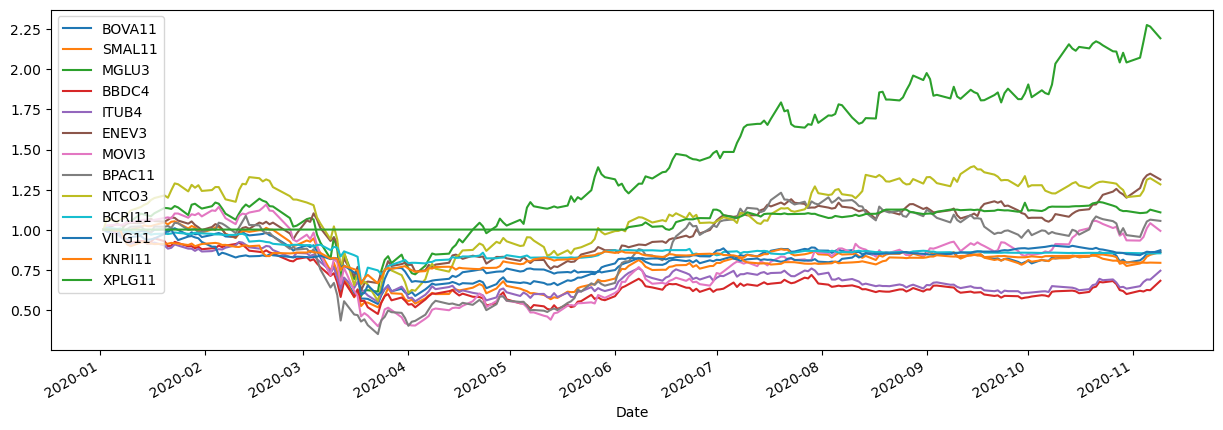

In [22]:
carteira_norm = cotacoes_carteira / cotacoes_carteira.iloc[0]
carteira_norm.plot(figsize=(15, 5))
plt.legend(loc='upper left')
plt.show()

### Vamos puxar o IBOV para comparar

### Criando um dataframe da Carteira com as quantidades de ações

### Comparação Carteira x IBOV

### Correlação da Carteira com o IBOV